<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.413527,37.844986,49.452779,2.159609,122.870902,125.564514,-2.693612
1,0.0,1.0,90.172557,55.707428,74.496790,-0.758234,229.618541,227.704816,1.913725
2,0.0,2.0,26.376714,78.098792,60.738996,9.639308,184.853811,176.649463,8.204347
3,0.0,3.0,68.806023,94.551149,46.154035,-22.198621,197.312586,215.234574,-17.921989
4,0.0,4.0,80.459844,40.015980,52.212514,-11.152213,171.536125,181.880099,-10.343975
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.764439,51.190869,89.606791,5.115288,176.677387,177.214176,-0.536789
119996,999.0,116.0,72.071633,78.531391,62.399343,-14.437480,208.564886,221.918005,-13.353119
119997,999.0,117.0,76.229794,82.172800,82.216594,-2.447640,248.171548,250.270010,-2.098463
119998,999.0,118.0,74.633528,20.036734,87.242278,-4.911085,187.001454,193.482693,-6.481239


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.413527,37.844986,49.452779,2.159609,122.870902,125.564514,-2.693612
1,0.0,1.0,90.172557,55.707428,74.496790,-0.758234,229.618541,227.704816,1.913725
2,0.0,2.0,26.376714,78.098792,60.738996,9.639308,184.853811,176.649463,8.204347
3,0.0,3.0,68.806023,94.551149,46.154035,-22.198621,197.312586,215.234574,-17.921989
4,0.0,4.0,80.459844,40.015980,52.212514,-11.152213,171.536125,181.880099,-10.343975
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.764439,51.190869,89.606791,5.115288,176.677387,177.214176,-0.536789
119996,999.0,116.0,72.071633,78.531391,62.399343,-14.437480,208.564886,221.918005,-13.353119
119997,999.0,117.0,76.229794,82.172800,82.216594,-2.447640,248.171548,250.270010,-2.098463
119998,999.0,118.0,74.633528,20.036734,87.242278,-4.911085,187.001454,193.482693,-6.481239


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    23.413527  37.844986  49.452779  ...  122.870902  125.564514  -2.693612
      1.0    90.172557  55.707428  74.496790  ...  229.618541  227.704816   1.913725
      2.0    26.376714  78.098792  60.738996  ...  184.853811  176.649463   8.204347
      3.0    68.806023  94.551149  46.154035  ...  197.312586  215.234574 -17.921989
      4.0    80.459844  40.015980  52.212514  ...  171.536125  181.880099 -10.343975
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  20.764439  51.190869  89.606791  ...  176.677387  177.214176  -0.536789
      116.0  72.071633  78.531391  62.399343  ...  208.564886  221.918005 -13.353119
      117.0  76.229794  82.172800  82.216594  ...  248.171548  250.270010  -2.098463
      118.0  74.633528  20.036734  87.242278  ...  187.001454  193.482693  -6.481239
      119.0  73.908112  41.594737  67.599527  ...  200.185156  193.048951   7.136205

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    23.413527  37.844986  49.452779  ...  122.870902  125.564514  -2.693612
      1.0    90.172557  55.707428  74.496790  ...  229.618541  227.704816   1.913725
      2.0    26.376714  78.098792  60.738996  ...  184.853811  176.649463   8.204347
      3.0    68.806023  94.551149  46.154035  ...  197.312586  215.234574 -17.921989
      4.0    80.459844  40.015980  52.212514  ...  171.536125  181.880099 -10.343975
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  20.764439  51.190869  89.606791  ...  176.677387  177.214176  -0.536789
      116.0  72.071633  78.531391  62.399343  ...  208.564886  221.918005 -13.353119
      117.0  76.229794  82.172800  82.216594  ...  248.171548  250.270010  -2.098463
      118.0  74.633528  20.036734  87.242278  ...  187.001454  193.482693  -6.481239
      119.0  73.908112  41.594737  67.599527  ...  200.185156  193.048951   7.136205

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.413527,37.844986,49.452779,2.159609,122.870902,125.564514,-2.693612
1,0.0,1.0,90.172557,55.707428,74.496790,-0.758234,229.618541,227.704816,1.913725
2,0.0,2.0,26.376714,78.098792,60.738996,9.639308,184.853811,176.649463,8.204347
3,0.0,3.0,68.806023,94.551149,46.154035,-22.198621,197.312586,215.234574,-17.921989
4,0.0,4.0,80.459844,40.015980,52.212514,-11.152213,171.536125,181.880099,-10.343975
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.764439,51.190869,89.606791,5.115288,176.677387,177.214176,-0.536789
119996,999.0,116.0,72.071633,78.531391,62.399343,-14.437480,208.564886,221.918005,-13.353119
119997,999.0,117.0,76.229794,82.172800,82.216594,-2.447640,248.171548,250.270010,-2.098463
119998,999.0,118.0,74.633528,20.036734,87.242278,-4.911085,187.001454,193.482693,-6.481239


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    23.413527  37.844986  49.452779  ...  122.870902  125.564514  -2.693612
      1.0    90.172557  55.707428  74.496790  ...  229.618541  227.704816   1.913725
      2.0    26.376714  78.098792  60.738996  ...  184.853811  176.649463   8.204347
      3.0    68.806023  94.551149  46.154035  ...  197.312586  215.234574 -17.921989
      4.0    80.459844  40.015980  52.212514  ...  171.536125  181.880099 -10.343975
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  20.764439  51.190869  89.606791  ...  176.677387  177.214176  -0.536789
      116.0  72.071633  78.531391  62.399343  ...  208.564886  221.918005 -13.353119
      117.0  76.229794  82.172800  82.216594  ...  248.171548  250.270010  -2.098463
      118.0  74.633528  20.036734  87.242278  ...  187.001454  193.482693  -6.481239
      119.0  73.908112  41.594737  67.599527  ...  200.185156  193.048951   7.136205

[120000 rows x 7 columns]

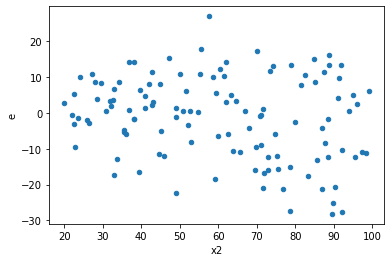

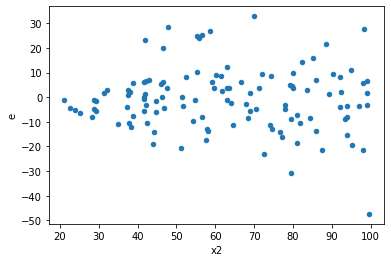

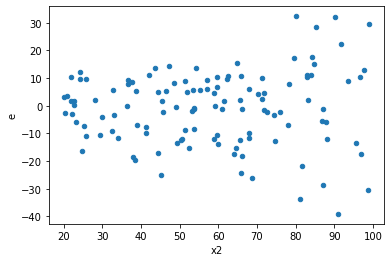

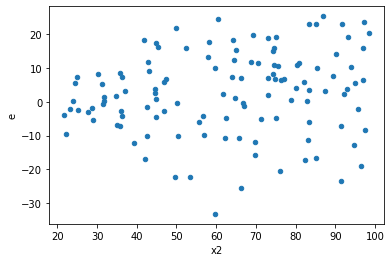

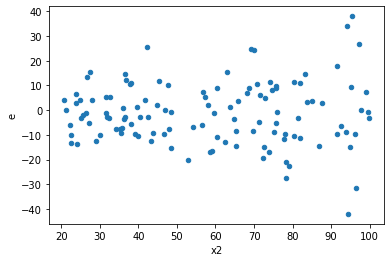

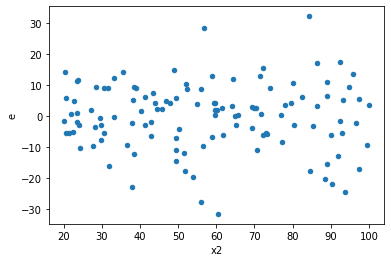

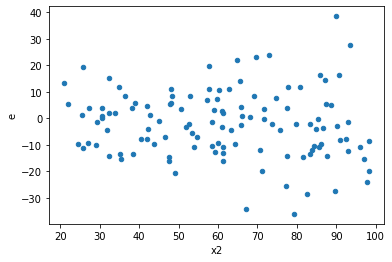

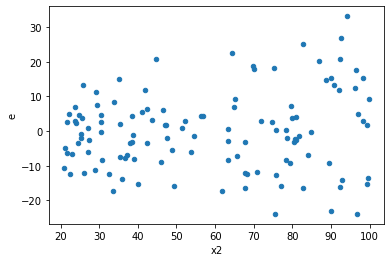

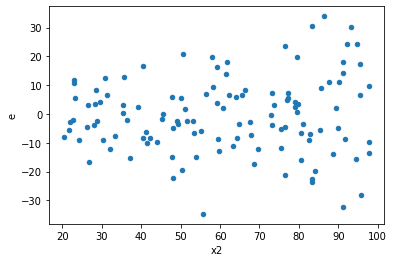

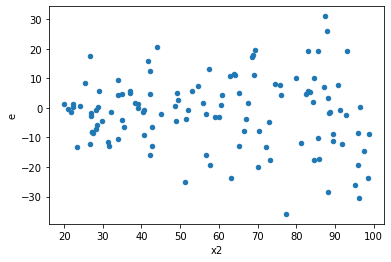

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,3041.288332987391,12970.589035147561,67.58418517749759,288.235311892168,4.26483372012506,3.3384018791604575e-06,0.9999983307990604,1.6692009395802287e-06,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,3822.8191805920087,11269.21353573187,84.95153734648908,250.4269674607082,2.9478803478187787,0.0004251030348767504,0.9997874484825616,0.0002125515174383752,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,2528.2910714682866,9016.633579991356,56.18424603262859,200.369635110919,3.566295701370733,3.943287244845273e-05,0.9999802835637758,1.9716436224226364e-05,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,3835.061000041977,6942.086590056349,85.2235777787106,154.2685908901411,1.810163277710671,0.049391719296735914,0.975304140351632,0.024695859648367957,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,3168.5463104164332,10519.771103955249,70.4121402314763,233.77269119900552,3.32006228514699,9.943414753865731e-05,0.9999502829262307,4.971707376932866e-05,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,3890.2022987435307,9497.706295955373,86.44893997207846,211.0601399101194,2.4414427751027166,0.0033874713440589233,0.9983062643279705,0.0016937356720294616,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,3038.7315642819212,13878.720241607674,67.5273680951538,308.4160053690594,4.567274189251178,1.2261112491973591e-06,0.9999993869443754,6.130556245986796e-07,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,4020.5476985934183,9770.786560236875,89.34550441318707,217.12859022748611,2.430212819923805,0.0035509129674280437,0.998224543516286,0.0017754564837140219,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2954.968829682342,8236.02023831068,65.66597399294093,183.02267196245958,2.7871766888302676,0.0008119547257443571,0.9995940226371278,0.00040597736287217856,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,3041.288332987391,12970.589035147561,67.58418517749759,288.235311892168,4.26483372012506,3.3384018791604575e-06,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,3822.8191805920087,11269.21353573187,84.95153734648908,250.4269674607082,2.9478803478187787,0.0004251030348767504,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,2528.2910714682866,9016.633579991356,56.18424603262859,200.369635110919,3.566295701370733,3.943287244845273e-05,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,3835.061000041977,6942.086590056349,85.2235777787106,154.2685908901411,1.810163277710671,0.049391719296735914,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,3168.5463104164332,10519.771103955249,70.4121402314763,233.77269119900552,3.32006228514699,9.943414753865731e-05,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,3890.2022987435307,9497.706295955373,86.44893997207846,211.0601399101194,2.4414427751027166,0.0033874713440589233,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,3038.7315642819212,13878.720241607674,67.5273680951538,308.4160053690594,4.567274189251178,1.2261112491973591e-06,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,4020.5476985934183,9770.786560236875,89.34550441318707,217.12859022748611,2.430212819923805,0.0035509129674280437,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2954.968829682342,8236.02023831068,65.66597399294093,183.02267196245958,2.7871766888302676,0.0008119547257443571,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    906
Reject005=1 : Homoscedasticity       94
Name: Result_test, dtype: int64